<a href="https://colab.research.google.com/github/HRJ369/CL249--Computational-Lab/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# Function to calculate divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # The first column is the y-values
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0, :]  # Return the first row which contains the coefficients

# Function to evaluate Newton polynomial and print its formula
def newton_poly_formula(x_data, coef):
    n = len(x_data)
    polynomial = f"{coef[0]:.4f}"  # The first term (constant term)
    poly_expr = [f"{coef[0]:.4f}"]

    for i in range(1, n):
        term = coef[i]
        term_str = f"{coef[i]:.4f}"
        for j in range(i):
            term_str += f" * (x - {x_data[j]:.4f})"
        poly_expr.append(term_str)

    # Create polynomial string
    polynomial = " + ".join(poly_expr)
    return polynomial

# Function to evaluate Newton polynomial at a specific x value
def newton_poly(x_data, coef, x):
    n = len(x_data)
    poly = coef[0]  # Start with the first term (constant term)
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        poly += term
    return poly

# Given data points
x_data = np.array([0, 1, 2.5, 3, 4.5, 5, 6])
y_data = np.array([2, 5.4375, 7.3516, 7.5625, 8.4453, 9.1875, 12])

# Calculate the divided difference coefficients
coef = divided_diff(x_data, y_data)

# Find the value of the polynomial at x = 3.5
x_value = 3.5
y_value = newton_poly(x_data, coef, x_value)

# Print the polynomial and the result
polynomial = newton_poly_formula(x_data, coef)
print(f"The Newton interpolating polynomial is:\nP(x) = {polynomial}")
print(f"\nThe estimated y value at x = {x_value} is: {y_value:.4f}")


The Newton interpolating polynomial is:
P(x) = 2.0000 + 3.4375 * (x - 0.0000) + -0.8646 * (x - 0.0000) * (x - 1.0000) + 0.1458 * (x - 0.0000) * (x - 1.0000) * (x - 2.5000) + 0.0000 * (x - 0.0000) * (x - 1.0000) * (x - 2.5000) * (x - 3.0000) + -0.0000 * (x - 0.0000) * (x - 1.0000) * (x - 2.5000) * (x - 3.0000) * (x - 4.5000) + 0.0000 * (x - 0.0000) * (x - 1.0000) * (x - 2.5000) * (x - 3.0000) * (x - 4.5000) * (x - 5.0000)

The estimated y value at x = 3.5 is: 7.7422


Spline interval [1, 2]:
S(x) = 3.0000 + 1.1921(x - 1.0000) + 0.0000(x - 1.0000)^2 + 1.8079(x - 1.0000)^3

Spline interval [2, 3]:
S(x) = 6.0000 + 6.6157(x - 2.0000) + 5.4236(x - 2.0000)^2 + 0.9607(x - 2.0000)^3

Spline interval [3, 5]:
S(x) = 19.0000 + 20.3450(x - 3.0000) + 8.3057(x - 3.0000)^2 + 0.7609(x - 3.0000)^3

Spline interval [5, 7]:
S(x) = 99.0000 + 62.6987(x - 5.0000) + 12.8712(x - 5.0000)^2 + 1.8897(x - 5.0000)^3

Spline interval [7, 8]:
S(x) = 291.0000 + 136.8603(x - 7.0000) + 24.2096(x - 7.0000)^2 + -8.0699(x - 7.0000)^3

The estimated value of the function at x = 4 is: 48.4116


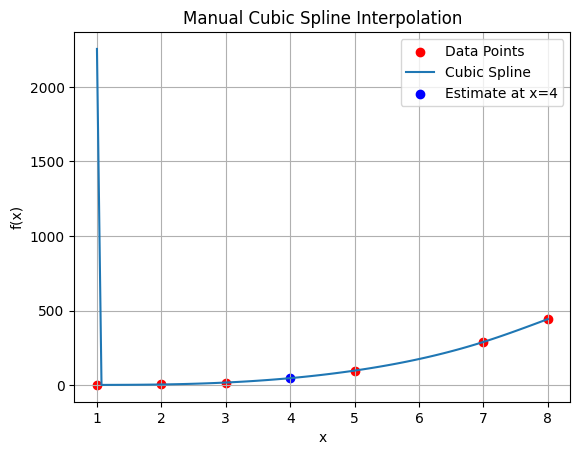

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x_data = np.array([1, 2, 3, 5, 7, 8])
y_data = np.array([3, 6, 19, 99, 291, 444])

# Number of intervals
n = len(x_data) - 1

# Step 1: Calculate h_i (x difference between consecutive points)
h = np.diff(x_data)

# Step 2: Calculate alphas for the system of equations
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3/h[i]) * (y_data[i+1] - y_data[i]) - (3/h[i-1]) * (y_data[i] - y_data[i-1])

# Step 3: Set up the system of equations for c_i (natural spline conditions)
l = np.ones(n+1)
mu = np.zeros(n+1)
z = np.zeros(n+1)
c = np.zeros(n+1)
b = np.zeros(n)
d = np.zeros(n)

# Step 4: Forward elimination in the tridiagonal system
for i in range(1, n):
    l[i] = 2 * (x_data[i+1] - x_data[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Step 5: Back substitution to solve for c_i, b_i, and d_i
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (y_data[j+1] - y_data[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Output the cubic spline coefficients for each interval
for i in range(n):
    print(f"Spline interval [{x_data[i]}, {x_data[i+1]}]:")
    print(f"S(x) = {y_data[i]:.4f} + {b[i]:.4f}(x - {x_data[i]:.4f}) + {c[i]:.4f}(x - {x_data[i]:.4f})^2 + {d[i]:.4f}(x - {x_data[i]:.4f})^3")
    print()

# Step 6: Estimate the value at x = 4
def evaluate_spline(x_data, y_data, b, c, d, x):
    # Find the right interval for x
    i = np.searchsorted(x_data, x) - 1
    dx = x - x_data[i]
    return y_data[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Estimate the value at x = 4
x_value = 4
y_value = evaluate_spline(x_data, y_data, b, c, d, x_value)

# Output the estimated value
print(f"The estimated value of the function at x = {x_value} is: {y_value:.4f}")

# Plot the cubic spline and the data points
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = np.array([evaluate_spline(x_data, y_data, b, c, d, xp) for xp in x_plot])

plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Cubic Spline')
plt.scatter(x_value, y_value, color='blue', label=f'Estimate at x={x_value}')
plt.legend()
plt.title("Manual Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


Spline interval [1, 2]:
S(x) = 3.0000 + 1.1921(x - 1.0000) + 0.0000(x - 1.0000)^2 + 1.8079(x - 1.0000)^3

Spline interval [2, 3]:
S(x) = 6.0000 + 6.6157(x - 2.0000) + 5.4236(x - 2.0000)^2 + 0.9607(x - 2.0000)^3

Spline interval [3, 5]:
S(x) = 19.0000 + 20.3450(x - 3.0000) + 8.3057(x - 3.0000)^2 + 0.7609(x - 3.0000)^3

Spline interval [5, 7]:
S(x) = 99.0000 + 62.6987(x - 5.0000) + 12.8712(x - 5.0000)^2 + 1.8897(x - 5.0000)^3

Spline interval [7, 8]:
S(x) = 291.0000 + 136.8603(x - 7.0000) + 24.2096(x - 7.0000)^2 + -8.0699(x - 7.0000)^3

The estimated value of the function at x = 4 is: 48.4116


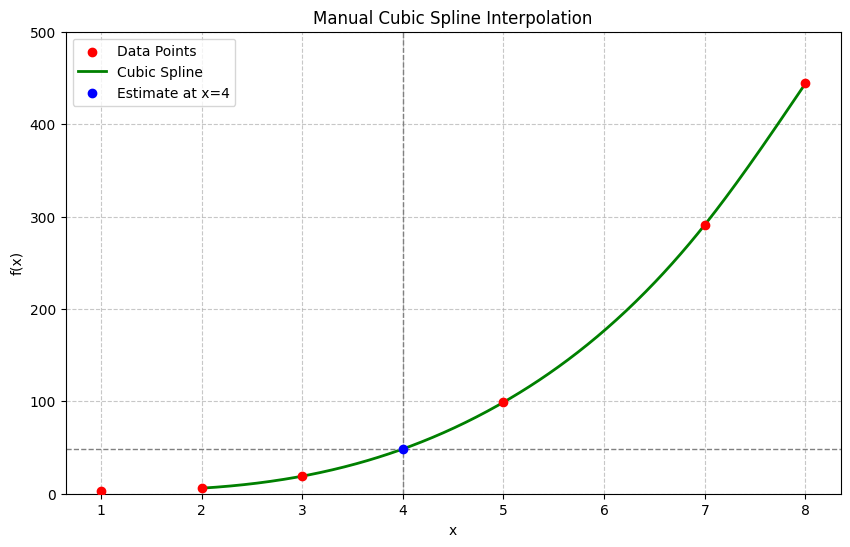

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x_data = np.array([1, 2, 3, 5, 7, 8])
y_data = np.array([3, 6, 19, 99, 291, 444])

# Number of intervals
n = len(x_data) - 1

# Step 1: Calculate h_i (x difference between consecutive points)
h = np.diff(x_data)

# Step 2: Calculate alphas for the system of equations
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3/h[i]) * (y_data[i+1] - y_data[i]) - (3/h[i-1]) * (y_data[i] - y_data[i-1])

# Step 3: Set up the system of equations for c_i (natural spline conditions)
l = np.ones(n+1)
mu = np.zeros(n+1)
z = np.zeros(n+1)
c = np.zeros(n+1)
b = np.zeros(n)
d = np.zeros(n)

# Step 4: Forward elimination in the tridiagonal system
for i in range(1, n):
    l[i] = 2 * (x_data[i+1] - x_data[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Step 5: Back substitution to solve for c_i, b_i, and d_i
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (y_data[j+1] - y_data[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Output the cubic spline coefficients for each interval
for i in range(n):
    print(f"Spline interval [{x_data[i]}, {x_data[i+1]}]:")
    print(f"S(x) = {y_data[i]:.4f} + {b[i]:.4f}(x - {x_data[i]:.4f}) + {c[i]:.4f}(x - {x_data[i]:.4f})^2 + {d[i]:.4f}(x - {x_data[i]:.4f})^3")
    print()

# Step 6: Estimate the value at x = 4
def evaluate_spline(x_data, y_data, b, c, d, x):
    # Find the right interval for x
    i = np.searchsorted(x_data, x) - 1
    dx = x - x_data[i]
    return y_data[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Estimate the value at x = 4
x_value = 4
y_value = evaluate_spline(x_data, y_data, b, c, d, x_value)

# Output the estimated value
print(f"The estimated value of the function at x = {x_value} is: {y_value:.4f}")

# Plot the cubic spline and the data points
x_plot = np.linspace(2, max(x_data), 500)  # Starting from x = 2 to remove the left side spline
y_plot = np.array([evaluate_spline(x_data, y_data, b, c, d, xp) for xp in x_plot])

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Data Points', zorder=5)
plt.plot(x_plot, y_plot, label='Cubic Spline', linewidth=2, color='green')
plt.scatter(x_value, y_value, color='blue', label=f'Estimate at x={x_value}', zorder=5)
plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=1)
plt.ylim(0, 500)  # Set y-axis scale to 0-500
plt.legend()
plt.title("Manual Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

